### importo le librerie necessarie

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
from keras.regularizers import l1_l2,l2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from keras.layers import Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report
from keras.layers import Dropout
from keras import optimizers


Using TensorFlow backend.


### importo i dataset

In [2]:
train_M=pd.read_csv("C:/Users/1995m/OneDrive/Desktop/train.csv")

In [3]:
test_M=pd.read_csv("C:/Users/1995m/OneDrive/Desktop/train.csv")

### ottenimento di variabili dummy al posto delle variabili qualitative

In [4]:
train_M = pd.get_dummies(train_M,columns=["SEX","EDUCATION","MARRIAGE"])
train_M.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


### standardizzazione variabili numeriche


In [0]:
features = ["LIMIT_BAL","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
to_std = train_M[features]
train_M[features] = (to_std - to_std.mean())/to_std.std()

### divisione train e test set


In [0]:
train,test=train_test_split(train_M)

In [10]:
test.shape

(6750, 34)

### bilanciamento

In [0]:
train_0=train[train["default.payment.next.month"]==0]

In [12]:
train_0.shape

(15814, 34)

In [0]:
train_1=train[train["default.payment.next.month"]==1]

In [14]:
train_1.shape

(4436, 34)

In [0]:
train_0b=train_0.sample(n=train_1.shape[0])

In [16]:
train_0b.shape

(4436, 34)

In [0]:
train_balanced=pd.concat([train_1,train_0b],axis=0)

In [18]:
train_balanced.shape

(8872, 34)

In [19]:
train_balanced.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
16171,-0.055641,0.166550,0.904137,1.779066,1.806072,0.186622,0.233215,0.251359,0.659189,0.732302,0.746397,0.732835,0.826945,0.901211,-0.082135,-0.252186,-0.057612,-0.101017,-0.092764,-0.092529,1,1,0,0,0,1,0,0,0,0,0,0,1,0
12148,-1.138083,-1.245505,0.904137,-0.725180,-0.696611,-1.519997,-1.525917,-1.482373,-0.698120,-0.628439,-0.678093,-0.671943,-0.662903,-0.653703,0.441060,-0.233777,-0.293741,-0.303667,-0.318774,-0.288988,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4379,1.181434,-0.811027,0.904137,-1.559929,-0.696611,-0.666688,-0.646351,-0.615507,-0.698011,-0.691460,-0.660775,-0.671943,-0.653035,-0.553939,-0.336401,-0.201169,-0.293741,-0.266116,0.075880,-0.262978,1,0,1,0,1,0,0,0,0,0,0,0,1,0
4089,-0.983448,-1.354125,-0.872681,1.779066,-0.696611,-0.666688,0.233215,0.251359,-0.689144,-0.686879,-0.673388,-0.262423,-0.258782,-0.234984,-0.336401,-0.238326,1.188810,-0.248217,-0.247315,-0.243055,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3003,1.954607,0.166550,0.015728,0.109569,0.137617,0.186622,0.233215,0.251359,4.949547,5.092448,4.926624,5.384720,5.886535,6.229423,0.659965,0.407722,0.493355,0.603814,0.878215,0.415665,1,1,0,0,0,1,0,0,0,0,0,1,0,0


In [21]:
train_balanced.shape

(8872, 34)

### creazione numpy array

In [0]:
X=train_balanced.drop("default.payment.next.month",axis=1).values

In [0]:
Y=train_balanced["default.payment.next.month"].values

In [0]:
X_test=test.drop("default.payment.next.month",axis=1).values

In [0]:
Y_test=test["default.payment.next.month"].values

In [27]:
X.shape[1]

33

### creazione e valutazione modello 1

In [28]:
model = Sequential()
model.add(Dense(512, input_dim=X.shape[1], activation="relu",kernel_regularizer=l1_l2(l1=0.0000001,l2=0.0000001)))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu",kernel_regularizer=l1_l2(l1=0.0000001,l2=0.0000001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
network_history=model.fit(X, Y,validation_data=(X_test,Y_test),batch_size=256 ,epochs=700)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8872 samples, validate on 6750 samples
Epoch 1/700


8872/8872 [==============================] - 1s 135us/step - loss: 0.6712 - acc: 0.5809 - val_loss: 0.6761 - val_acc: 0.5671
Epoch 2/700
8872/8872 [==============================] - 0s 29us/step - loss: 0.6524 - acc: 0.6108 - val_loss: 0.6653 - val_acc: 0.6006
Epoch 3/700
8872/8872 [==============================] - 0s 26us/step - loss: 0.6399 - acc: 0.6241 - val_loss: 0.6562 - val_acc: 0.6197
Epoch 4/700
8872/8872 [==============================] - 0s 24us/step - loss: 0.6329 - acc: 0.6335 - val_loss: 0.6464 - val_acc: 0.6462
Epoch 5/700
8872/8872 [==============================] - 0s 24us/step - loss: 0.6267 - acc: 0.6504 - val_loss: 0.6422 - val_acc: 0.6561
Epoch 6/700
8872/8872 [=============================

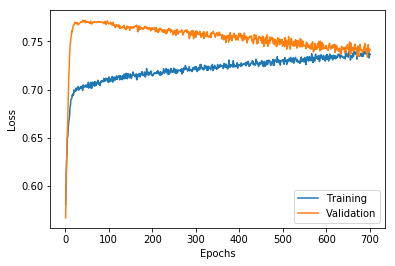

In [29]:
x_plot = list(range(1,701))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_plot, network_history.history['acc'])
plt.plot(x_plot, network_history.history['val_acc'])
plt.legend(['Training', 'Validation'])


In [31]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5

cm=confusion_matrix(Y_test,y_pred)
prf=precision_recall_fscore_support(Y_test,y_pred)

print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")


confusion matrix
 [[4051 1162]
 [ 581  956]]
precision
 [0.87456822 0.45136922]
recall
 [0.77709572 0.62199089]
f-score
 [0.82295582 0.52311902]


In [32]:
cr=classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5213
           1       0.45      0.62      0.52      1537

    accuracy                           0.74      6750
   macro avg       0.66      0.70      0.67      6750
weighted avg       0.78      0.74      0.75      6750



### creazione e valutazione modello 2

In [0]:
adam = optimizers.Adam()

In [50]:
model = Sequential()

model.add(Dense(32, input_dim=X.shape[1]))#,kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.05))
model.add(Dense(16))##,kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
network_history=model.fit(X, Y,validation_data=(X_test,Y_test),batch_size=512 ,epochs=400)

Train on 8872 samples, validate on 6750 samples
Epoch 1/400
8872/8872 [==============================] - 1s 81us/step - loss: 0.6732 - acc: 0.5795 - val_loss: 0.6150 - val_acc: 0.6837
Epoch 2/400
8872/8872 [==============================] - 0s 16us/step - loss: 0.6053 - acc: 0.6779 - val_loss: 0.5944 - val_acc: 0.7816
Epoch 3/400
8872/8872 [==============================] - 0s 17us/step - loss: 0.5924 - acc: 0.6975 - val_loss: 0.5760 - val_acc: 0.7698
Epoch 4/400
8872/8872 [==============================] - 0s 14us/step - loss: 0.5864 - acc: 0.6983 - val_loss: 0.5646 - val_acc: 0.7713
Epoch 5/400
8872/8872 [==============================] - 0s 14us/step - loss: 0.5835 - acc: 0.6996 - val_loss: 0.5785 - val_acc: 0.7655
Epoch 6/400
8872/8872 [==============================] - 0s 14us/step - loss: 0.5793 - acc: 0.7006 - val_loss: 0.5752 - val_acc: 0.7628
Epoch 7/400
8872/8872 [==============================] - 0s 14us/step - loss: 0.5775 - acc: 0.7022 - val_loss: 0.5588 - val_acc: 0.7732


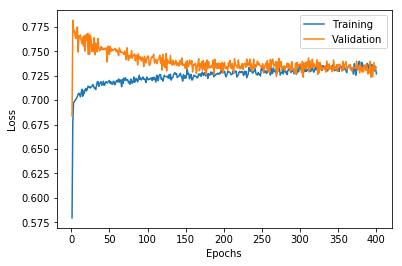

In [51]:
x_plot = list(range(1,401))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_plot, network_history.history['acc'])
plt.plot(x_plot, network_history.history['val_acc'])
plt.legend(['Training', 'Validation'])


In [53]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5

cm=confusion_matrix(Y_test,y_pred)
prf=precision_recall_fscore_support(Y_test,y_pred)

print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")


                   

confusion matrix
 [[3972 1241]
 [ 558  979]]
precision
 [0.87682119 0.44099099]
recall
 [0.7619413  0.63695511]
f-score
 [0.81535461 0.5211605 ]


In [52]:
cr=classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      5213
           1       0.45      0.63      0.52      1537

    accuracy                           0.74      6750
   macro avg       0.66      0.70      0.67      6750
weighted avg       0.78      0.74      0.75      6750

